## Model Training


In [20]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Model Selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [6]:
#Data Inspection
df = pd.read_csv('data/StudentsPerformance.csv')

In [7]:
#Show the first 5 rows of the data set
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#Prepare X and y
X = df.drop('math score', axis=1)
y = df['math score']


In [9]:
#Data Preprocessing
#Create column transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
X= preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [15]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

Create an Evalution Function to all given matrics after Model Training

In [19]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, rmse, mae, r2

In [24]:
#Model Selection
models = {
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate the model
    mse_train, rmse_train, mae_train, r2_train = evaluate_model(y_train, y_train_pred)
    mse_test, rmse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])
    r2_list.append(r2_test)

    print("------------------------------------")
    print(f"Model: {list(models.keys())[i]}")
    print("Model Performance for Training Set ")
    print("------------------------------------")
    print(f"MSE: {mse_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")
    print(f"R2: {r2_train}")
    print("\n")

    print("Model Performance for Testing Set")
    print("------------------------------------")
    print(f"MSE: {mse_test}")
    print(f"RMSE: {rmse_test}")
    print(f"MAE: {mae_test}")
    print(f"R2: {r2_test}")
    print("\n")
    print("------------------------------------")
    

------------------------------------
Model: KNN
Model Performance for Training Set 
------------------------------------
MSE: 32.6859
RMSE: 5.71715838507208
MAE: 4.527
R2: 0.8550176780012468


Model Performance for Testing Set
------------------------------------
MSE: 52.6388
RMSE: 7.255260160738552
MAE: 5.627999999999999
R2: 0.7836806685669011


------------------------------------
------------------------------------
Model: Linear Regression
Model Performance for Training Set 
------------------------------------
MSE: 28.346870956420897
RMSE: 5.3241779606264945
MAE: 4.268154296875
R2: 0.8742639739869204


Model Performance for Testing Set
------------------------------------
MSE: 29.1773779296875
RMSE: 5.401608827903729
MAE: 4.21859375
R2: 0.8800954640546355


------------------------------------
------------------------------------
Model: Ridge
Model Performance for Training Set 
------------------------------------
MSE: 28.337788233082456
RMSE: 5.323324922741656
MAE: 4.264987823725

In [33]:
#Result
#pring the all model with  R2 score in descending order
result = pd.DataFrame({'Model': model_list, 'R2': r2_list})
result = result.sort_values(by='R2', ascending=False)
result

,Model,R2
2,Ridge,0.880593
1,Linear Regression,0.880095
7,Gradient Boosting,0.872190
8,AdaBoost,0.850899
4,Random Forest,0.847012
9,XGBoost,0.827797
3,Lasso,0.825320
0,KNN,0.783681
6,SVR,0.728600
5,Decision Tree,0.718540


We will consider Linear Regression as both Ridge and LR are the same

Linear Regression

In [34]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Linear Regression R2 Score: {score}")

Linear Regression R2 Score: 0.8800954640546355


Plot y_pred and y_test

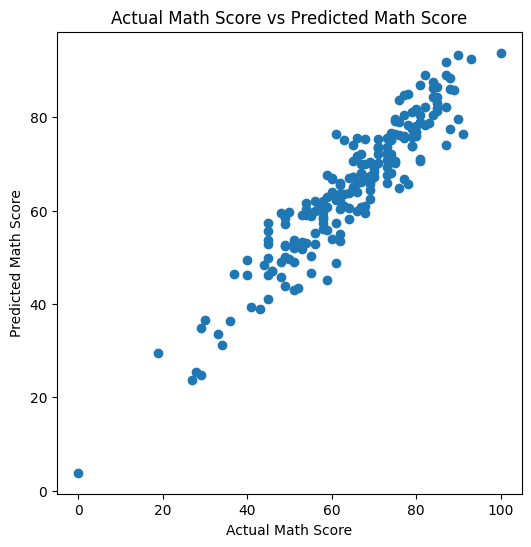

In [36]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual Math Score vs Predicted Math Score")
plt.show()

<Axes: xlabel='math score'>

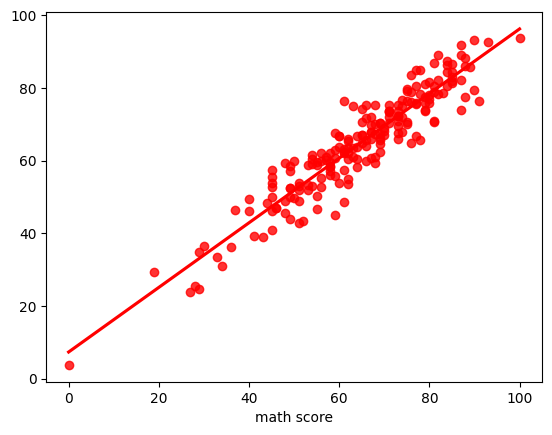

In [37]:
sns.regplot(x=y_test, y=y_pred, color='red',ci= None)

### Difference between the Actual vs Predicated Values

In [38]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df.head(10)

,Actual,Predicted,Difference
521,91,76.492188,14.507812
737,53,58.976562,-5.976562
740,80,76.890625,3.109375
660,74,76.742188,-2.742188
411,84,87.500000,-3.500000
678,81,78.929688,2.070312
626,69,64.531250,4.468750
513,54,53.093750,0.906250
859,87,74.085938,12.914062
136,51,49.070312,1.929688
